In [3]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [4]:
# 2. Load dataset
df = pd.read_csv("customer_clv_model_ready.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TenureGroup_49-60m,TenureGroup_61-72m,HasFiberOptic,IsAutoPay,IsSenior,MultipleLines_Yes,Contract_Two year.1,PaymentMethod_E-Check,PaymentMethod_Mail Check,InternetService_No Internet
0,0,0,1,0,1,0,0,1,0,0,...,False,False,0,0,0,False,False,True,False,False
1,1,0,0,0,34,1,1,0,1,0,...,False,False,0,0,0,False,False,False,True,False
2,1,0,0,0,2,1,1,1,0,0,...,False,False,0,0,0,False,False,False,True,False
3,1,0,0,0,45,0,1,0,1,1,...,False,False,0,0,0,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,1,0,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,1,...,False,False,0,0,0,True,False,False,True,False
7028,0,0,1,1,72,1,0,1,1,0,...,False,True,1,1,0,True,False,False,False,False
7029,0,0,1,1,11,0,1,0,0,0,...,False,False,0,0,0,False,False,True,False,False
7030,1,1,1,0,4,1,0,0,0,0,...,False,False,1,0,1,True,False,False,True,False


In [5]:
## drop the sentiment columns before splitting
## Drop non-useful columns first
df.drop(['avg_review_sentiment', 'min_review_sentiment', 'max_review_sentiment'], axis=1, inplace=True)

In [6]:
#  Define feature matrix (X) and target variable (y)
# Drop 'CLV' (target) and 'customerID' (non-predictive ID column) from features
X = df.drop(['CLV', 'customerID'], axis=1, errors='ignore')

In [7]:
# Set the target variable  as CLV
y = df['CLV']

In [8]:
# split the dataset into training and testing sets
# 80% of data for training, 20% for testing; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
## Train & Evaluate Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
lr_pred = lr_model.predict(X_test)

# Evaluate performance
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_r2 = r2_score(y_test, lr_pred)

# Display results
print("Linear Regression Performance")
print(f"MAE:  {lr_mae:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²:   {lr_r2:.4f}")

Linear Regression Performance
MAE:  33.70
RMSE: 51.51
R²:   0.9995


C:\Users\Acer\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
##Step 2: Train & Evaluate Random Forest
from sklearn.ensemble import RandomForestRegressor

#  Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(" Random Forest Performance")
print(f"MAE:  {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²:   {rf_r2:.4f}")

 Random Forest Performance
MAE:  43.52
RMSE: 65.66
R²:   0.9992


C:\Users\Acer\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\Acer\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost Performance
MAE:  22.83
RMSE: 35.96
R²:   0.9997


NameError: name 'plt' is not defined

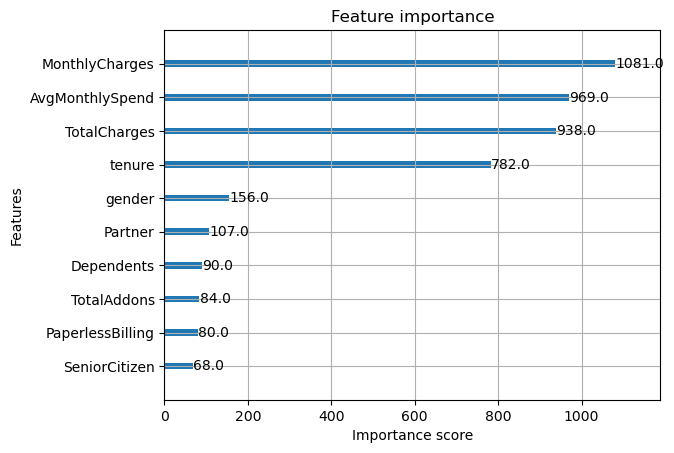

In [11]:
## Train & Evaluate XGBoost

try:
    from xgboost import XGBRegressor, plot_importance
    xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    xgb_model.fit(X_train, y_train)

    # Predict and evaluate
    xgb_pred = xgb_model.predict(X_test)
    xgb_mae = mean_absolute_error(y_test, xgb_pred)
    xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
    xgb_r2 = r2_score(y_test, xgb_pred)

    print("XGBoost Performance")
    print(f"MAE:  {xgb_mae:.2f}")
    print(f"RMSE: {xgb_rmse:.2f}")
    print(f"R²:   {xgb_r2:.4f}")

    # Plot feature importance
    plot_importance(xgb_model, max_num_features=10)
    plt.title("Top 10 Important Features - XGBoost")
    plt.tight_layout()
    plt.show()

except ImportError:
    print("XGBoost is not installed.")

### The length of the bar shows the importance score — how often and effectively that feature was used by the model to split decision trees and improve predictions.

### “According to XGBoost’s feature importance, MonthlyCharges, TotalCharges, and AvgMonthlySpend are the top predictors of CLV. This highlights that customer billing patterns play a dominant role in revenue potential.”

In [ ]:
# Compare all model performances
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE":   [lr_mae, rf_mae, xgb_mae if 'xgb_mae' in locals() else None],
    "RMSE":  [lr_rmse, rf_rmse, xgb_rmse if 'xgb_rmse' in locals() else None],
    "R²":    [lr_r2, rf_r2, xgb_r2 if 'xgb_r2' in locals() else None]
})

print("\n Model Performance Comparison:")
print(comparison_df.sort_values(by="R²", ascending=False))

## XGBOOST being the best suitable model accross all matrix
why?
MAE (Mean Absolute Error):
Average difference between predicted and actual CLV. Lower is better.

RMSE (Root Mean Squared Error):
Penalizes larger errors more. Again, lower is better.

R² (Coefficient of Determination):
Measures how well your model explains variance in the target.
Values close to 1.0 mean excellent fit.

## Used XGBoost as final model — it provides the most accurate predictions of Customer Lifetime Value (CLV), with the lowest error and highest R².

## Conclusion : Among the models tested, XGBoost achieved the best predictive performance (MAE: 22.83, RMSE: 35.96, R²: 0.99975). This indicates that XGBoost can reliably estimate CLV based on customer behavior and billing features, outperforming both Linear Regression and Random Forest.”

import pandas as pd
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Score'])
importance_df = importance_df.sort_values(by='Score', ascending=False)

# Filter for sentiment-related features
sentiment_importance = importance_df[importance_df.index.str.contains('sentiment')]
print(sentiment_importance)

print(df[['avg_review_sentiment', 'min_review_sentiment', 'max_review_sentiment']].describe())
print(df[['avg_review_sentiment', 'min_review_sentiment', 'max_review_sentiment']].isnull().sum())

In [12]:
### : Identify and Retrain the Best Model 
# Define full feature set and target again
X_full = df.drop(['CLV', 'customerID'], axis=1, errors='ignore')
y_full = df['CLV']

# Retrain final model
from xgboost import XGBRegressor
final_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
final_model.fit(X_full, y_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
##  Save the Final Model
import joblib
joblib.dump(final_model, "xgboost_clv_model_final.pkl")
print("Final model saved successfully.")

Final model saved successfully.


<Figure size 1000x600 with 0 Axes>

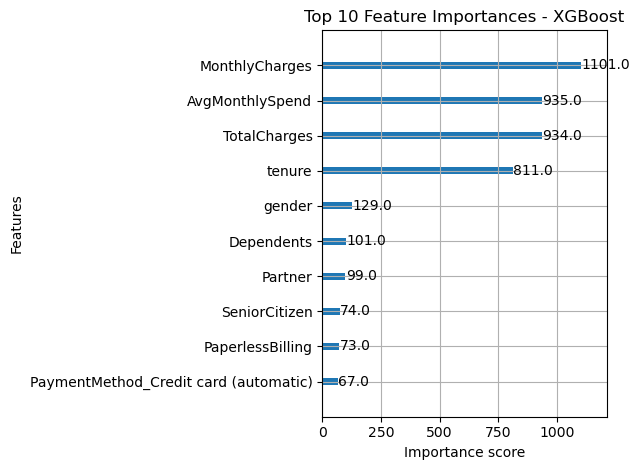

In [32]:
## Plot Final Feature Importances
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(final_model, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

In [35]:
## Make Predictions
sample = X_full.iloc[[3]]  # Take the first customer as an example
predicted_clv = final_model.predict(sample)
print(f"Predicted CLV: ${predicted_clv[0]:.2f}")

Predicted CLV: $1849.01


In [36]:
## just ti cross verfiy with original value 
df.iloc[3]

gender                                           1
SeniorCitizen                                    0
Partner                                          0
Dependents                                       0
tenure                                          45
PhoneService                                     0
OnlineSecurity                                   1
OnlineBackup                                     0
DeviceProtection                                 1
TechSupport                                      1
StreamingTV                                      0
StreamingMovies                                  0
PaperlessBilling                                 0
MonthlyCharges                                42.3
TotalCharges                               1840.75
Churn                                            0
CLV                                         1903.5
Contract_One year                             True
Contract_Two year                            False
PaymentMethod_Credit card (auto

In [37]:
##Compare actual vs predicted CLV:
actual = df.loc[3, 'CLV']
print(f"Actual CLV: ${actual:.2f}")

Actual CLV: $1903.50


### This means the XGBoost model estimates that this customer (row 0 in your data) is likely to generate $36.61 in total lifetime revenue for the company, based on:

Their billing behavior

Tenure

Plan and services used

Demographics